Variable    Type                  Data/Info
-------------------------------------------
Axes3D      type                  <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>
DataView    classobj              __main__.DataView
FullPrint   classobj              __main__.FullPrint
QuickPlot   classobj              __main__.QuickPlot
R           ndarray               41Lx41L: 1681 elems, type `float64`, 13448 bytes
cm          module                <module 'matplotlib.cm' f<...>kages\matplotlib\cm.pyc'>
dv          __main__.DataView     <__main__.DataView instan<...>ce at 0x0000000007A04F08>
dx          float                 0.25
dy          float                 0.25
i           int                   39
j           int                   39
np          module                <module 'numpy' from 'C:\<...>ages\numpy\__init__.pyc'>
plt         module                <module 'matplotlib.pyplo<...>s\matplotlib\pyplot.pyc'>
qp          __main__.QuickPlot    <__main__.QuickPlot insta<...>ce at 0x00000000

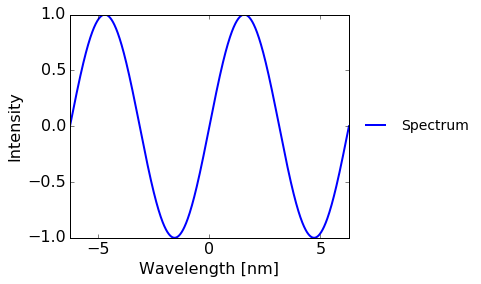

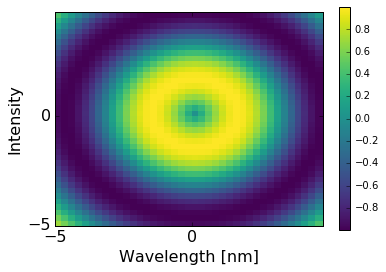

In [50]:
"""
This code defines a quick data viewing and plotting class. It is meant to be used to speed up preliminary data analysis by 
mimicking some features of MATLAB.

The main features are a plotting class which generates 2D scatter plots from X and Y data, and surface plots from 2D data maps, 
a workspace viewer class, and 2D variable viewer class with makes tables.

"""

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
from matplotlib import cm


class QuickPlot():
    
    def __init__(self):
        self.title = 'title'
        self.xlabel = 'xlabel'
        self.ylabel = 'ylabel'
        self.linewidth = 2.0
        self.colormap = 'viridis'
        self.spectrum_label = 'Spectrum'
   
    def tidygraph(self, ax, aspect=1):
        ax.set_aspect(aspect*(ax.get_data_ratio())**-1)
        ax.tick_params(direction='in')
        plt.locator_params(axis='y', nbins=5)
        plt.locator_params(axis='x', nbins=4)
    
        plt.xlabel('Wavelength [nm]', fontsize=16)
        plt.ylabel('Intensity', fontsize=16)
    
        ax.tick_params(axis='both', which='major', labelsize=16)
        ax.legend(frameon=False,loc='center left', bbox_to_anchor=(1, 0.5),fontsize=14)
        return ax
    
    def plot(self, xdata, ydata):
        fig1, ax1 = plt.subplots()
        ax1.plot(xdata, ydata, label = self.spectrum_label, linewidth=2.0)
        plt.axis([xdata.min(), xdata.max(), ydata.min(), ydata.max()])
        self.tidygraph(ax1, aspect=0.80)
        
    def surf(self, xdata, ydata, zdata):
        fig2, ax2 = plt.subplots()
        xdata, ydata = np.meshgrid(xdata, ydata)
        zdata = zdata[:-1, :-1]
        zdata_min, zdata_max = -np.abs(zdata).max(), np.abs(zdata).max()
        surf = plt.pcolor(xdata, ydata, zdata, cmap='viridis', vmin=zdata_min, vmax=zdata_max)
        plt.axis([xdata.min(), xdata.max(), ydata.min(), ydata.max()])
        plt.colorbar()
        self.tidygraph(ax2, aspect=0.80)
        

class DataView(): 
    
    def workspace(self):
        %whos
        
    def data_view(self,varname):
        with FullPrint():
            print(varname)
            

class FullPrint():
    'context manager for printing full numpy arrays'
    
    def __init__(self, **kwargs):
        kwargs.setdefault('threshold', np.inf)
        self.opt = kwargs

    def __enter__(self):
        self._opt = np.get_printoptions()
        np.set_printoptions(**self.opt)

    def __exit__(self, type, value, traceback):
        np.set_printoptions(**self._opt)
        
    
if __name__ == '__main__':
    
    xplotdata = np.linspace(-2*np.pi,2*np.pi,1000)
    yplotdata = np.sin(xplotdata)

    xscatdata = np.arange(-5, 5, 0.25)
    yscatdata = np.arange(-5, 5, 0.25)
    zscatdata = np.zeros([len(xscatdata),len(yscatdata)])
    for i in range(len(xscatdata)):
        for j in range(len(yscatdata)):
            zscatdata[j][i] = np.sin(np.sqrt(xscatdata[i]**2 + yscatdata[j]**2))
            
    qp = QuickPlot()
    qp.plot(xplotdata,yplotdata)
    qp.surf(xscatdata,yscatdata,zscatdata)
    
    dv = DataView()
    dv.workspace()
    dv.data_view(zscatdata)
    
    print('Run finished')